<a href="https://colab.research.google.com/github/22MIS1002/software_testing/blob/main/bug_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

#-- plotly
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
#--

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#import os
#print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.

In [ ]:
data = pd.read_csv("/content/jm1.csv")

In [ ]:
# Define the number of features in your input data
num_features = data.shape[1]


In [ ]:
data.info() #informs about the data (memory usage, data types etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

In [ ]:
data.head() #shows first 5 rows

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True


In [ ]:
data.tail() #shows last 5 rows

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,13,0,2,0,10,15,30,22,7,False
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,5,0,2,0,12,8,19,11,3,False
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,29,1,10,0,18,15,59,44,7,False
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,6,0,2,0,9,8,21,15,1,False
10884,19.0,3.0,1.0,1.0,58.0,272.63,0.09,11.57,23.56,3154.67,...,13,0,2,1,12,14,31,27,5,False


In [ ]:
data.sample(10) #shows random rows (sample(number_of_rows))

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
4732,18.0,3.0,3.0,2.0,30.0,117.21,0.09,11.00,10.66,1289.27,...,12,0,4,0,10,5,19,11,5,False
7756,123.0,24.0,14.0,18.0,529.0,3124.75,0.02,64.55,48.41,201710.52,...,99,15,5,0,22,38,306,223,47,False
3204,13.0,5.0,4.0,5.0,29.0,123.19,0.15,6.87,17.92,846.93,...,6,1,1,1,11,8,19,10,9,False
365,74.0,12.0,10.0,5.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,23,True
220,19.0,2.0,1.0,2.0,39.0,171.30,0.10,10.00,17.13,1713.00,...,14,0,3,0,12,9,24,15,3,True
9379,16.0,3.0,1.0,3.0,67.0,307.19,0.09,11.00,27.93,3379.12,...,13,0,0,1,12,12,45,22,5,False
2193,73.0,8.0,4.0,7.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,15,False
10552,4.0,1.0,1.0,1.0,10.0,31.70,0.40,2.50,12.68,79.25,...,2,0,0,0,5,4,6,4,1,False
3557,28.0,2.0,1.0,2.0,81.0,393.50,0.17,5.89,66.85,2316.26,...,23,1,1,0,7,22,44,37,3,False
1776,143.0,22.0,11.0,16.0,457.0,2762.29,0.02,47.25,58.46,130518.11,...,123,5,8,5,22,44,268,189,43,True


In [ ]:
data.shape #shows the number of rows and columns

(10885, 22)

In [ ]:
data.describe() #shows simple statistics (min, max, mean, etc.)

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment
count,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,10885.000000,1.088500e+04,10885.000000,1.088500e+04,10885.000000,10885.000000,10885.00000,10885.000000
mean,42.016178,6.348590,3.401047,4.001599,114.389738,673.758017,0.135335,14.177237,29.439544,3.683637e+04,0.224766,2.046465e+03,26.252274,2.737529,4.62554,0.370785
std,76.593332,13.019695,6.771869,9.116889,249.502091,1938.856196,0.160538,18.709900,34.418313,4.343678e+05,0.646408,2.413154e+04,59.611201,9.008608,9.96813,1.907969
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,11.000000,2.000000,1.000000,1.000000,14.000000,48.430000,0.030000,3.000000,11.860000,1.619400e+02,0.020000,9.000000e+00,4.000000,0.000000,0.00000,0.000000
50%,23.000000,3.000000,1.000000,2.000000,49.000000,217.130000,0.080000,9.090000,21.930000,2.031020e+03,0.070000,1.128300e+02,13.000000,0.000000,2.00000,0.000000
75%,46.000000,7.000000,3.000000,4.000000,119.000000,621.480000,0.160000,18.900000,36.780000,1.141643e+04,0.210000,6.342500e+02,28.000000,2.000000,5.00000,0.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,418.200000,569.780000,3.107978e+07,26.950000,1.726655e+06,2824.000000,344.000000,447.00000,108.000000


In [ ]:
defects_true_false = data.groupby('defects')['b'].apply(lambda x: x.count()) #defect rates (true/false)
print('False : ' , defects_true_false[0])
print('True : ' , defects_true_false[1])

False :  8779
True :  2106


In [ ]:
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.2 MB/s eta 0:00:00


In [ ]:
!pip install -U plotly-orca

ERROR: Could not find a version that satisfies the requirement plotly-orca (from versions: none)
ERROR: No matching distribution found for plotly-orca


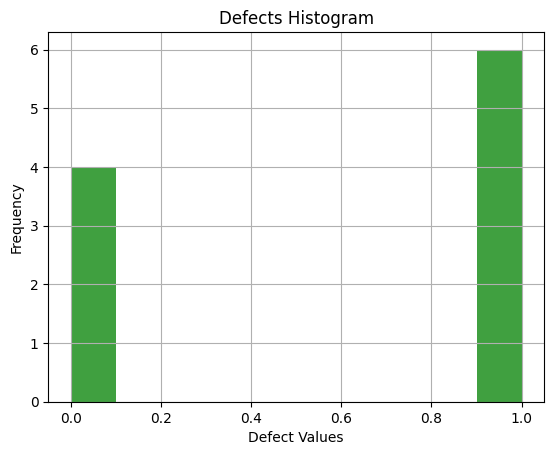

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'defects_data' is your list/array of defect data
defects_data = [1, 0, 1, 1, 0, 0, 1, 0, 1, 1]  # Example defect data (replace with your actual data)

# Plot the histogram
plt.hist(defects_data, color='green', alpha=0.75)
plt.title('Defects Histogram')
plt.xlabel('Defect Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


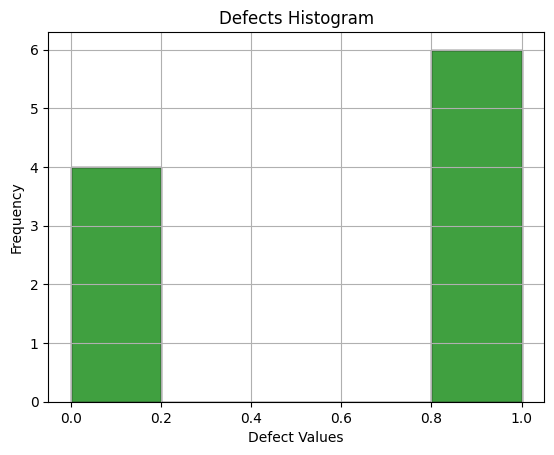

In [ ]:
import seaborn as sns

# Assuming 'defects_data' is your list/array of defect data
defects_data = [1, 0, 1, 1, 0, 0, 1, 0, 1, 1]  # Example defect data (replace with your actual data)

# Plot the histogram using Seaborn
sns.histplot(defects_data, color='green', alpha=0.75)
plt.title('Defects Histogram')
plt.xlabel('Defect Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [21]:
import matplotlib.pyplot as plt

# Histogram with Matplotlib
plt.hist(data['defects'], bins=10, alpha=0.75, color='green', label='Defects')
plt.title('Defects')
plt.xlabel('True - False')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10880 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10880 non-null  float64
 1   v(g)               10880 non-null  float64
 2   ev(g)              10880 non-null  float64
 3   iv(g)              10880 non-null  float64
 4   n                  10880 non-null  float64
 5   v                  10880 non-null  float64
 6   l                  10880 non-null  float64
 7   d                  10880 non-null  float64
 8   i                  10880 non-null  float64
 9   e                  10880 non-null  float64
 10  b                  10880 non-null  float64
 11  t                  10880 non-null  float64
 12  lOCode             10880 non-null  int64  
 13  lOComment          10880 non-null  int64  
 14  lOBlank            10880 non-null  int64  
 15  locCodeAndComment  10880 non-null  int64  
 16  uniq_Op            10880 no

In [23]:
data['defects'] = data['defects'].astype(float)  # Convert values in 'column_name' to float

In [24]:
data = data[data['defects'].notnull()]

In [25]:
data['defects'] = data['defects'].astype(float)

In [26]:
data = data.select_dtypes(include=['number'])

In [27]:
data = data.apply(pd.to_numeric, errors='coerce')

In [28]:
corr_matrix = data.corr()

In [29]:
# Check for non-numeric values in the data DataFrame
data.info()

# Remove all non-numeric values from the DataFrame
data = data.select_dtypes(include=['number'])

# Alternatively, convert all non-numeric values to numeric values
# data = data.apply(pd.to_numeric, errors='coerce')

# Calculate the covariance matrix
corr_matrix = data.corr()

# Print the covariance matrix
print(corr_matrix)

<class 'pandas.core.frame.DataFrame'>
Index: 10880 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10880 non-null  float64
 1   v(g)               10880 non-null  float64
 2   ev(g)              10880 non-null  float64
 3   iv(g)              10880 non-null  float64
 4   n                  10880 non-null  float64
 5   v                  10880 non-null  float64
 6   l                  10880 non-null  float64
 7   d                  10880 non-null  float64
 8   i                  10880 non-null  float64
 9   e                  10880 non-null  float64
 10  b                  10880 non-null  float64
 11  t                  10880 non-null  float64
 12  lOCode             10880 non-null  int64  
 13  lOComment          10880 non-null  int64  
 14  lOBlank            10880 non-null  int64  
 15  locCodeAndComment  10880 non-null  int64  
 16  uniq_Op            10880 no

In [30]:
corr_matrix = data.corr()

In [31]:
# Check for non-numeric values in the data DataFrame
data.info()

# Remove rows with non-numeric values in any column
data = data.dropna()

# Calculate the covariance matrix
corr_matrix = data.corr()

# Print the covariance matrix
print(corr_matrix)

<class 'pandas.core.frame.DataFrame'>
Index: 10880 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10880 non-null  float64
 1   v(g)               10880 non-null  float64
 2   ev(g)              10880 non-null  float64
 3   iv(g)              10880 non-null  float64
 4   n                  10880 non-null  float64
 5   v                  10880 non-null  float64
 6   l                  10880 non-null  float64
 7   d                  10880 non-null  float64
 8   i                  10880 non-null  float64
 9   e                  10880 non-null  float64
 10  b                  10880 non-null  float64
 11  t                  10880 non-null  float64
 12  lOCode             10880 non-null  int64  
 13  lOComment          10880 non-null  int64  
 14  lOBlank            10880 non-null  int64  
 15  locCodeAndComment  10880 non-null  int64  
 16  uniq_Op            10880 no

In [32]:
data.corr() #shows coveriance matrix

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
loc,1.000000,0.817795,0.517599,0.784060,0.881790,0.900290,-0.286592,0.689529,0.499926,0.750578,...,0.921915,0.612873,0.803572,0.278119,0.536681,0.764622,0.880967,0.868275,0.830194,0.245437
v(g),0.817795,1.000000,0.701673,0.859591,0.730810,0.759910,-0.252825,0.669091,0.303072,0.709539,...,0.799949,0.384557,0.538381,0.209838,0.647430,0.700514,0.744164,0.696078,0.971958,0.208670
ev(g),0.517599,0.701673,1.000000,0.639572,0.466024,0.445931,-0.233862,0.434036,0.213267,0.315572,...,0.454634,0.294292,0.338253,0.190962,0.263000,0.337031,0.479935,0.435518,0.785553,0.172935
iv(g),0.784060,0.859591,0.639572,1.000000,0.702411,0.743192,-0.197696,0.575354,0.309715,0.757721,...,0.775872,0.351609,0.541284,0.207040,0.500750,0.617966,0.715244,0.668940,0.858994,0.181981
n,0.881790,0.730810,0.466024,0.702411,1.000000,0.984277,-0.240736,0.808101,0.651189,0.716556,...,0.944380,0.596409,0.798548,0.284404,0.610412,0.836171,0.995689,0.989484,0.747894,0.204087
v,0.900290,0.759910,0.445931,0.743192,0.984277,1.000000,-0.198092,0.752202,0.598730,0.800013,...,0.962077,0.576869,0.792323,0.266544,0.606993,0.852296,0.981565,0.971960,0.759971,0.189113
l,-0.286592,-0.252825,-0.233862,-0.197696,-0.240736,-0.198092,1.000000,-0.347213,-0.166792,-0.062034,...,-0.218360,-0.165945,-0.223636,-0.106154,-0.305331,-0.234892,-0.237325,-0.241023,-0.279126,-0.164721
d,0.689529,0.669091,0.434036,0.575354,0.808101,0.752202,-0.347213,1.000000,0.398085,0.574341,...,0.768175,0.502181,0.637171,0.253819,0.749305,0.639686,0.817546,0.777732,0.671976,0.169442
i,0.499926,0.303072,0.213267,0.309715,0.651189,0.598730,-0.166792,0.398085,1.000000,0.209277,...,0.563897,0.392598,0.572311,0.217834,0.391646,0.726696,0.620676,0.687891,0.325796,0.192643
e,0.750578,0.709539,0.315572,0.757721,0.716556,0.800013,-0.062034,0.574341,0.209277,1.000000,...,0.809090,0.384808,0.600673,0.148690,0.482061,0.586805,0.735802,0.673490,0.667886,0.086092


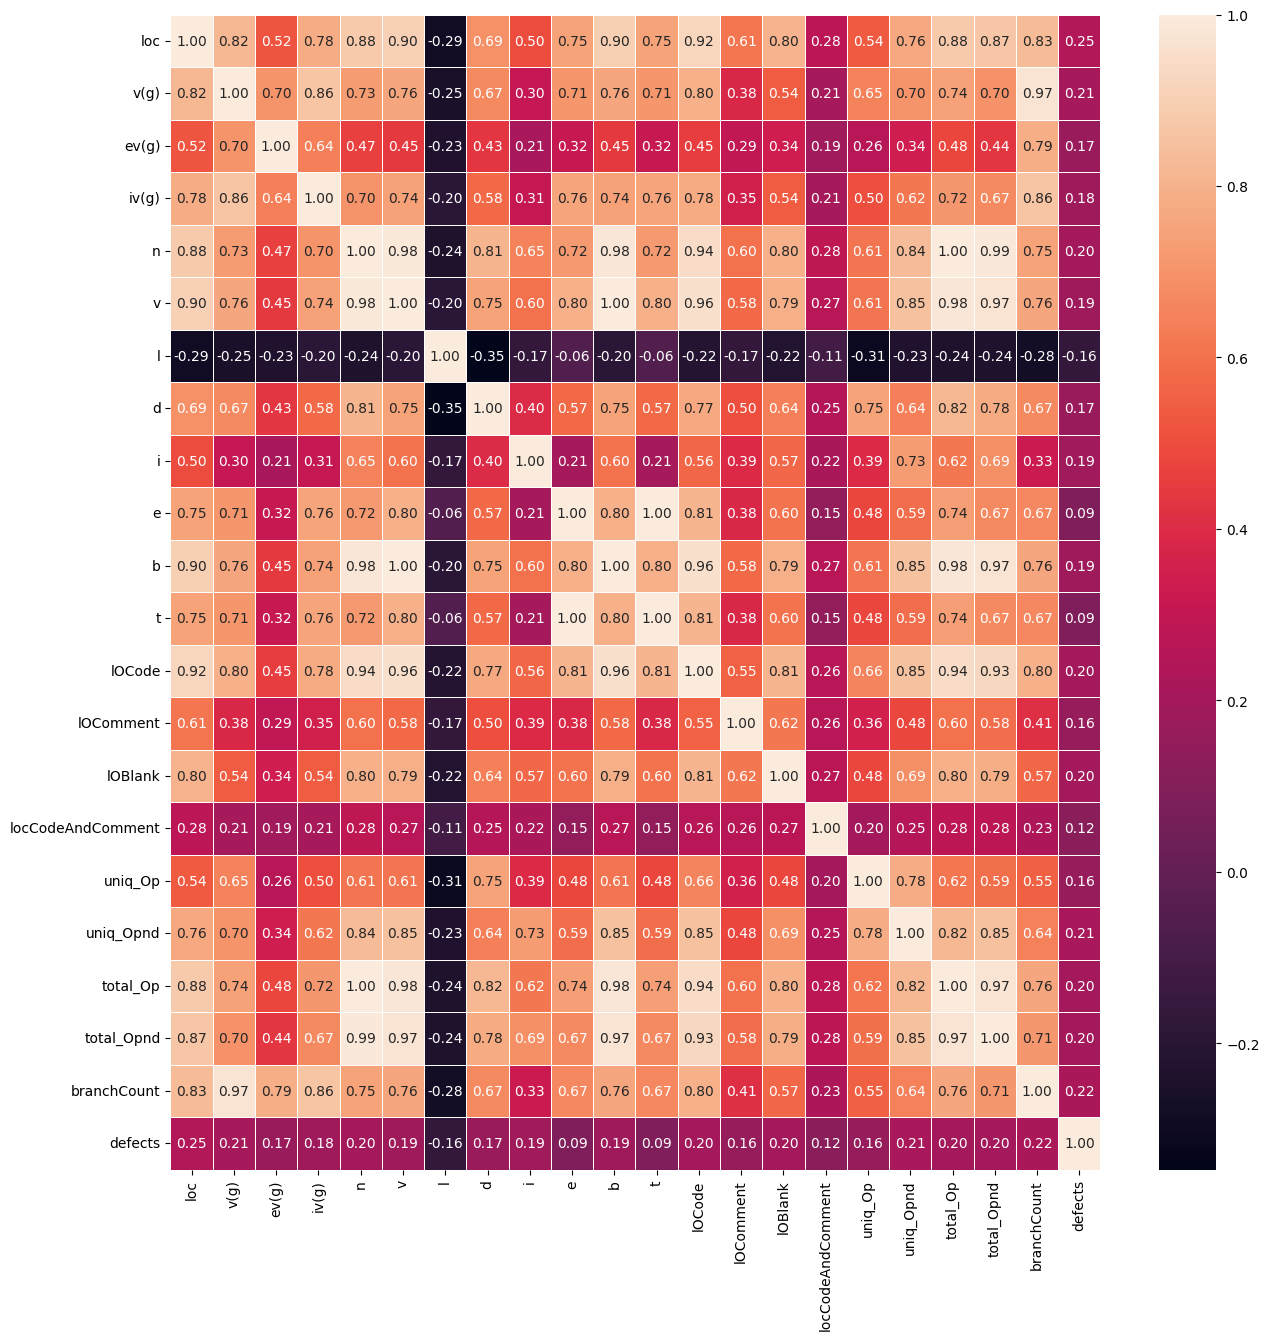

In [33]:
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

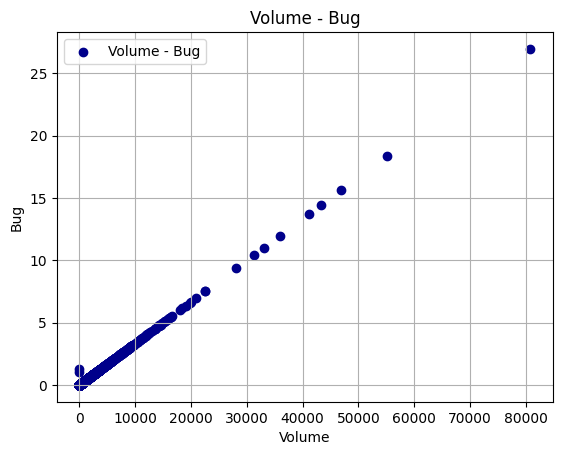

In [34]:
import matplotlib.pyplot as plt

# Scatter plot with Matplotlib
plt.scatter(data['v'], data['b'], color='darkblue', label='Volume - Bug')
plt.title('Volume - Bug')
plt.xlabel('Volume')
plt.ylabel('Bug')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
data.isnull().sum() #shows how many of the null

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [36]:
data['defects'] = pd.to_numeric(data['defects'], errors='coerce')

In [37]:
data['uniq_Op'] = data['defects'].drop_duplicates()

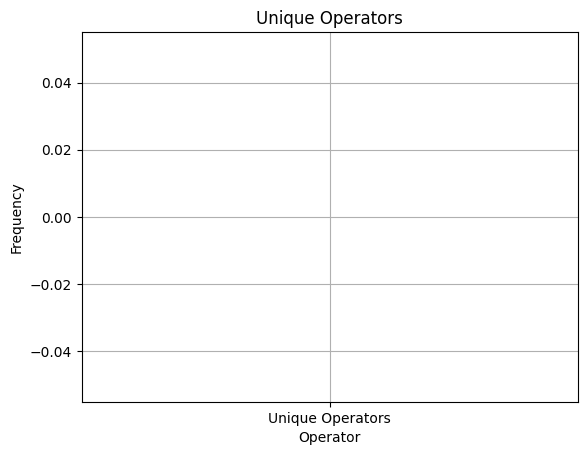

In [39]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the data
plt.boxplot(data['uniq_Op'], labels=['Unique Operators'], notch=True, patch_artist=True, boxprops=dict(facecolor='blue'))
plt.title('Unique Operators')
plt.xlabel('Operator')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [40]:
import pdb; pdb.set_trace()

In [41]:
data['defects'] = pd.to_numeric(data['defects'], errors='coerce')


In [42]:
import pandas as pd

# Assuming you've already reset the index of the DataFrame
data['defects'] = pd.to_numeric(data['defects'], errors='coerce')

# Get the unique values from the defects column
uniq_op = data['defects'].dropna().unique()  # dropna() removes NaN values before getting unique values

# Assign the unique values to the uniq_Op column
data['uniq_Op'] = data['defects'].apply(lambda x: uniq_op[np.argwhere(uniq_op == x)[0][0]] if not pd.isna(x) else None)


In [43]:
# Get unique values from the 'defects' column
uniq_op = data['defects'].unique()

# Create a dictionary mapping each unique value to itself
mapping_dict = {val: val for val in uniq_op}

# Map each value in the 'defects' column to its corresponding unique value
data['uniq_Op'] = data['defects'].map(mapping_dict)


In [44]:
# Assuming 'data' is your DataFrame and 'defects' is the column of interest
unique_defects = data['defects'].unique()
print(unique_defects)


[0. 1.]


In [45]:
import pandas as pd

# Assuming 'data' is your DataFrame
data['uniq_Op'] = data['defects']  # Assign 'defects' column to 'uniq_Op' for now

# Verify the lengths of the unique values and DataFrame
print("Length of unique values:", len(unique_defects))
print("Length of DataFrame:", len(data))

# If lengths match, you can directly assign the unique values
if len(unique_defects) == len(data):
    data['uniq_Op'] = unique_defects
    print("Unique values assigned to 'uniq_Op' column successfully.")
else:
    print("Lengths don't match. Investigate further.")


Length of unique values: 2
Length of DataFrame: 10880
Lengths don't match. Investigate further.


In [46]:
import pandas as pd

# Assuming 'data' is your DataFrame
data['uniq_Op'] = data['defects']  # Assign 'defects' column to 'uniq_Op' for now

# Create a mapping dictionary to map each value to its corresponding unique value
mapping_dict = {0: '0', 1: '1'}  # Modify as needed if the unique values are not string type

# Map each value in the 'defects' column to its corresponding unique value
data['uniq_Op'] = data['uniq_Op'].map(mapping_dict)

# Verify the first few rows of the DataFrame to see if mapping is successful
print(data.head())


     loc  v(g)  ev(g)  iv(g)      n        v     l      d       i         e  \
0    1.1   1.4    1.4    1.4    1.3     1.30  1.30   1.30    1.30      1.30   
1    1.0   1.0    1.0    1.0    1.0     1.00  1.00   1.00    1.00      1.00   
2   72.0   7.0    1.0    6.0  198.0  1134.13  0.05  20.31   55.85  23029.10   
3  190.0   3.0    1.0    3.0  600.0  4348.76  0.06  17.06  254.87  74202.67   
4   37.0   4.0    1.0    4.0  126.0   599.12  0.06  17.19   34.86  10297.30   

   ...  lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
0  ...       2          2        2                  2        0        1.2   
1  ...       1          1        1                  1        1        1.0   
2  ...      51         10        8                  1        1       36.0   
3  ...     129         29       28                  2        1      135.0   
4  ...      28          1        6                  0        1       16.0   

  total_Op  total_Opnd  branchCount  defects  
0      1.2     

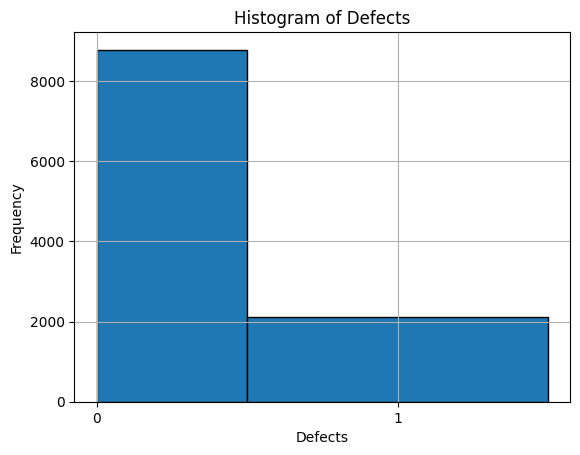

In [47]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(data['defects'], bins=[0, 0.5, 1.5], edgecolor='black')  # Specify bins for discrete values
plt.xlabel('Defects')
plt.ylabel('Frequency')
plt.title('Histogram of Defects')
plt.xticks([0, 1])  # Specify ticks for discrete values
plt.grid(True)
plt.show()


# LINE GRAPH

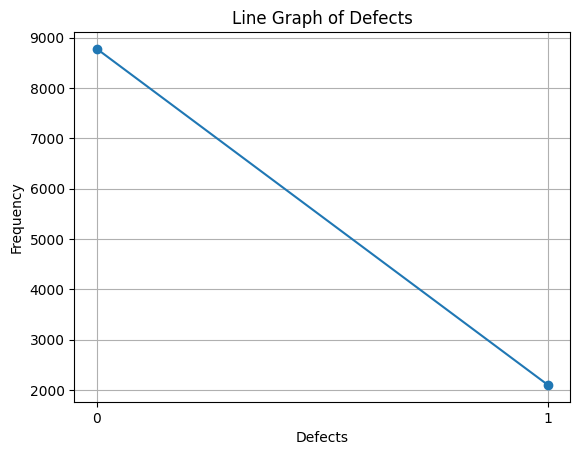

In [48]:
import matplotlib.pyplot as plt

# Group data by 'defects' column and count occurrences
defect_counts = data['defects'].value_counts().sort_index()

# Plot line graph
plt.plot(defect_counts.index, defect_counts.values, marker='o', linestyle='-')
plt.xlabel('Defects')
plt.ylabel('Frequency')
plt.title('Line Graph of Defects')
plt.xticks([0, 1])  # Specify ticks for discrete values
plt.grid(True)
plt.show()


# BOX PLOT

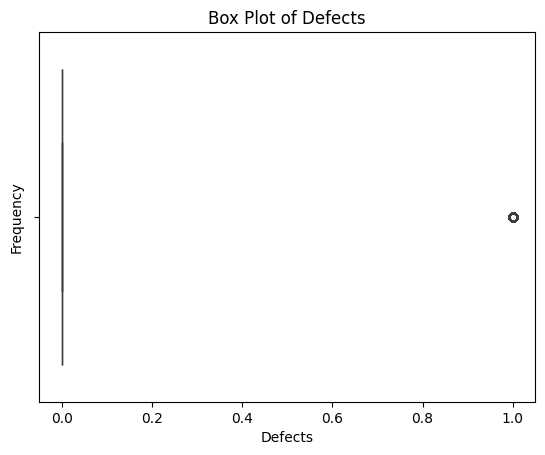

In [49]:
import seaborn as sns

# Plot box plot
sns.boxplot(data=data, x='defects')
plt.xlabel('Defects')
plt.ylabel('Frequency')
plt.title('Box Plot of Defects')
plt.show()


In [50]:
# Assuming 'data' is your DataFrame
data['uniq_Op'] = data['defects'].map({0: 0, 1: 1})


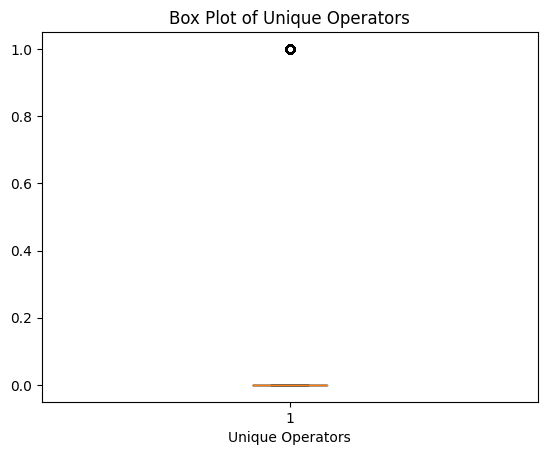

In [51]:
import matplotlib.pyplot as plt

# Create a box plot
plt.boxplot(data['uniq_Op'])
plt.xlabel('Unique Operators')
plt.title('Box Plot of Unique Operators')
plt.show()


In [52]:
def evaluation_control(data):
    evaluation = (data.n < 300) & (data.v < 1000 ) & (data.d < 50) & (data.e < 500000) & (data.t < 5000)
    data['complexityEvaluation'] = pd.DataFrame(evaluation)
    data['complexityEvaluation'] = ['Succesful' if evaluation == True else 'Redesign' for evaluation in data.complexityEvaluation]

In [53]:
evaluation_control(data)
data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,0,1.2,1.2,1.2,1.4,0.0,Succesful
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,Succesful
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,10,8,1,1,36.0,112.0,86.0,13.0,1.0,Redesign
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,29,28,2,1,135.0,329.0,271.0,5.0,1.0,Redesign
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,1,6,0,1,16.0,76.0,50.0,7.0,1.0,Succesful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,0,2,0,0,15.0,30.0,22.0,7.0,0.0,Succesful
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,0,2,0,0,8.0,19.0,11.0,3.0,0.0,Succesful
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,1,10,0,0,15.0,59.0,44.0,7.0,0.0,Succesful
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,0,2,0,0,8.0,21.0,15.0,1.0,0.0,Succesful


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10880 entries, 0 to 10884
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loc                   10880 non-null  float64
 1   v(g)                  10880 non-null  float64
 2   ev(g)                 10880 non-null  float64
 3   iv(g)                 10880 non-null  float64
 4   n                     10880 non-null  float64
 5   v                     10880 non-null  float64
 6   l                     10880 non-null  float64
 7   d                     10880 non-null  float64
 8   i                     10880 non-null  float64
 9   e                     10880 non-null  float64
 10  b                     10880 non-null  float64
 11  t                     10880 non-null  float64
 12  lOCode                10880 non-null  int64  
 13  lOComment             10880 non-null  int64  
 14  lOBlank               10880 non-null  int64  
 15  locCodeAndComment     10

In [55]:
data.groupby("complexityEvaluation").size() #complexityEvalution rates (Succesfull/redisgn)

complexityEvaluation
Redesign     1723
Succesful    9157
dtype: int64

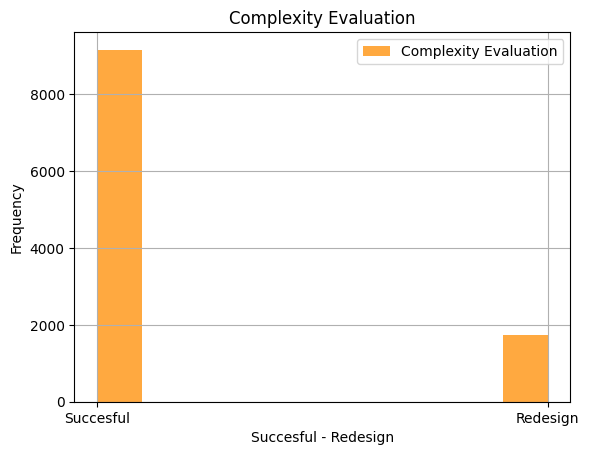

In [56]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the data
plt.hist(data['complexityEvaluation'], bins=10, alpha=0.75, color='darkorange', label='Complexity Evaluation')
plt.title('Complexity Evaluation')
plt.xlabel('Succesful - Redesign')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [57]:
from sklearn import preprocessing

scale_v = data[['v']]
scale_b = data[['b']]

minmax_scaler = preprocessing.MinMaxScaler()

v_scaled = minmax_scaler.fit_transform(scale_v)
b_scaled = minmax_scaler.fit_transform(scale_b)

data['v_ScaledUp'] = pd.DataFrame(v_scaled)
data['b_ScaledUp'] = pd.DataFrame(b_scaled)

data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation,v_ScaledUp,b_ScaledUp
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,0,1.2,1.2,1.2,1.4,0.0,Succesful,0.000016,0.048237
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1.0,1.0,1.0,1.0,1.0,Succesful,0.000012,0.037106
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,1,1,36.0,112.0,86.0,13.0,1.0,Redesign,0.014029,0.014100
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,2,1,135.0,329.0,271.0,5.0,1.0,Redesign,0.053793,0.053803
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,0,1,16.0,76.0,50.0,7.0,1.0,Succesful,0.007411,0.007421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,0,0,15.0,30.0,22.0,7.0,0.0,Succesful,NaN,NaN
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,0,0,8.0,19.0,11.0,3.0,0.0,Succesful,NaN,NaN
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,0,0,15.0,59.0,44.0,7.0,0.0,Succesful,NaN,NaN
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,0,0,8.0,21.0,15.0,1.0,0.0,Succesful,NaN,NaN


In [58]:
scaled_data = pd.concat([data.v , data.b , data.v_ScaledUp , data.b_ScaledUp], axis=1)
scaled_data

,v,b,v_ScaledUp,b_ScaledUp
0,1.30,1.30,0.000016,0.048237
1,1.00,1.00,0.000012,0.037106
2,1134.13,0.38,0.014029,0.014100
3,4348.76,1.45,0.053793,0.053803
4,599.12,0.20,0.007411,0.007421
...,...,...,...,...
10880,241.48,0.08,NaN,NaN
10881,129.66,0.04,NaN,NaN
10882,519.57,0.17,NaN,NaN
10883,147.15,0.05,NaN,NaN


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10880 entries, 0 to 10884
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loc                   10880 non-null  float64
 1   v(g)                  10880 non-null  float64
 2   ev(g)                 10880 non-null  float64
 3   iv(g)                 10880 non-null  float64
 4   n                     10880 non-null  float64
 5   v                     10880 non-null  float64
 6   l                     10880 non-null  float64
 7   d                     10880 non-null  float64
 8   i                     10880 non-null  float64
 9   e                     10880 non-null  float64
 10  b                     10880 non-null  float64
 11  t                     10880 non-null  float64
 12  lOCode                10880 non-null  int64  
 13  lOComment             10880 non-null  int64  
 14  lOBlank               10880 non-null  int64  
 15  locCodeAndComment     10

In [60]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import model_selection

X = data.iloc[:, :-10].values  #Select related attribute values for selection
Y = data.complexityEvaluation.values   #Select classification attribute values

In [61]:
Y

array(['Succesful', 'Succesful', 'Redesign', ..., 'Succesful',
       'Succesful', 'Succesful'], dtype=object)

In [62]:
#Parsing selection and verification datasets
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)

In [63]:
#Creation of Naive Bayes model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [64]:
kfold = model_selection.KFold(n_splits=10, shuffle=True)


In [65]:
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)


In [66]:
kfold = model_selection.KFold(n_splits=10)


In [67]:
# Option 1: Set shuffle=True
kfold = model_selection.KFold(n_splits = 10, shuffle = True, random_state = seed)

# Option 2: Remove random_state parameter
kfold = model_selection.KFold(n_splits = 10)

In [68]:
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring)

In [68]:
msg = "Mean : %f - Std : (%f)" % (cv_results.mean(), cv_results.std())
msg

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

    Redesign       0.93      0.96      0.94       318
   Succesful       0.99      0.99      0.99      1858

    accuracy                           0.98      2176
   macro avg       0.96      0.97      0.97      2176
weighted avg       0.98      0.98      0.98      2176

[[ 304   14]
 [  23 1835]]
ACC:  0.9829963235294118


In [70]:
    sel_loc = data['loc']
    sel_b = data['b']
    selected_data = pd.concat([sel_loc, sel_b], axis=1)
    selected_data
    #data selected for selection

,loc,b
0,1.1,1.30
1,1.0,1.00
2,72.0,0.38
3,190.0,1.45
4,37.0,0.20
...,...,...
10880,18.0,0.08
10881,9.0,0.04
10882,42.0,0.17
10883,10.0,0.05


In [71]:
selected_data.describe() #shows simple statistics (min, max, mean, etc.)

,loc,b
count,10880.000000,10880.00000
mean,42.020138,0.22477
std,76.608641,0.64654
min,1.000000,0.00000
25%,11.000000,0.02000
50%,23.000000,0.07000
75%,46.000000,0.21000
max,3442.000000,26.95000


In [72]:
selected_data.corr() #shows coveriance matrix

,loc,b
loc,1.000000,0.899962
b,0.899962,1.000000


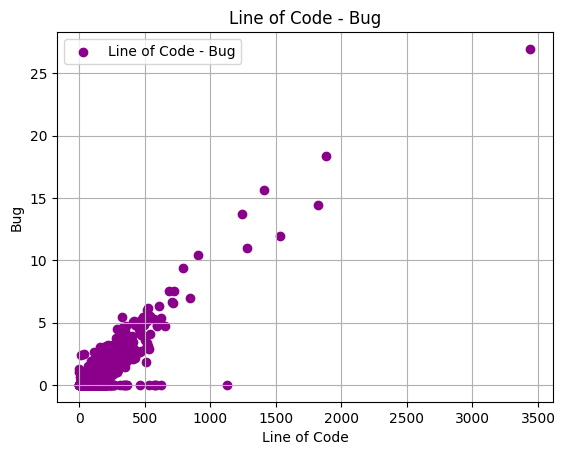

In [73]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the data
plt.scatter(data['loc'], data['b'], color='darkmagenta', label='Line of Code - Bug')
plt.title('Line of Code - Bug')
plt.xlabel('Line of Code')
plt.ylabel('Bug')
plt.legend()
plt.grid(True)
plt.show()


In [74]:
Y = selected_data['b'].values
X = selected_data['loc'].values
X = X.reshape(-1,1)
#Select the X and Y values for selection
Y

array([1.3 , 1.  , 0.38, ..., 0.17, 0.05, 0.09])

In [75]:
#Parsing selection and verification datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [76]:
#Creation of Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [77]:
# Intercept & Coef
print("Intercept :", model.intercept_)
print("Coef :", model.coef_)

Intercept : -0.09946427732674817
Coef : [0.00779649]


In [78]:
X_test

array([[  8.],
       [  4.],
       [ 19.],
       ...,
       [149.],
       [282.],
       [ 43.]])

In [80]:
y_pred = model.predict(X_test)

In [79]:
# New data (real , estimated)
new_data = pd.DataFrame({'real': y_test, 'estimated': y_pred})
new_data

,real,estimated
0,0.04,Succesful
1,0.01,Succesful
2,0.06,Succesful
3,0.07,Succesful
4,0.08,Succesful
...,...,...
2171,0.00,Succesful
2172,0.00,Succesful
2173,1.30,Redesign
2174,2.07,Redesign


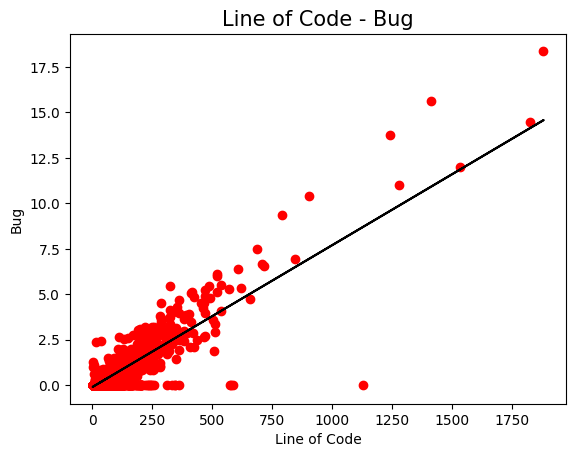

In [81]:
#The nearest line of all values in the model
plt.scatter(X_train, y_train, color = 'red')
modelin_tahmin_ettigi_y = model.predict(X_train)
plt.plot(X_train, modelin_tahmin_ettigi_y, color = 'black')
plt.title('Line of Code - Bug', size = 15)
plt.xlabel('Line of Code')
plt.ylabel('Bug')
plt.show()

In [82]:
#The results of the model. (This uses the Least squares method and the Root mean square error methods)
#In general, as these values are calculated as the mean value and the difference difference, it is considered that the model has better estimation ability as it approaches 0.
from sklearn import metrics
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error (MSE): 0.07327526550238518
Root Mean Squared Error (RMSE): 0.2706940440836946


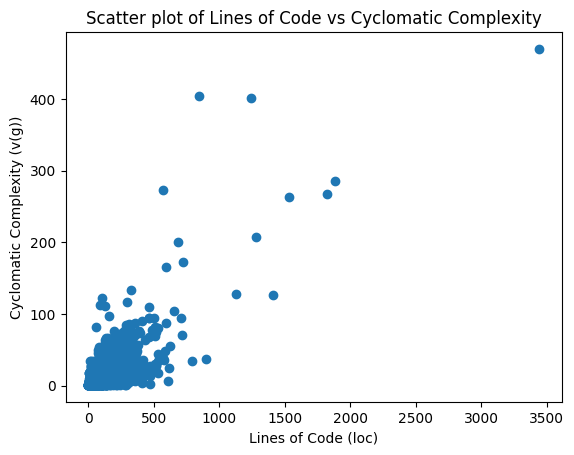

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Scatter plot of 'loc' vs 'v(g)'
plt.scatter(data['loc'], data['v(g)'])
plt.xlabel('Lines of Code (loc)')
plt.ylabel('Cyclomatic Complexity (v(g))')
plt.title('Scatter plot of Lines of Code vs Cyclomatic Complexity')
plt.show()


# Data Visualization:

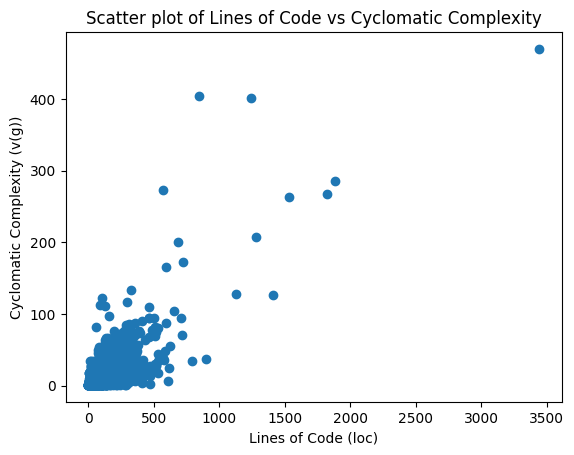

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Scatter plot of 'loc' vs 'v(g)'
plt.scatter(data['loc'], data['v(g)'])
plt.xlabel('Lines of Code (loc)')
plt.ylabel('Cyclomatic Complexity (v(g))')
plt.title('Scatter plot of Lines of Code vs Cyclomatic Complexity')
plt.show()


In [84]:
# Define the number of features in your input data
num_features = X_train.shape[1]

# Define the input shape for your model
input_shape = (num_features,)


In [85]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=input_shape),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [86]:
print(data.columns)


Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects',
       'complexityEvaluation', 'v_ScaledUp', 'b_ScaledUp'],
      dtype='object')


In [87]:
print(data.columns)


Index(['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
       'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
       'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount', 'defects',
       'complexityEvaluation', 'v_ScaledUp', 'b_ScaledUp'],
      dtype='object')


In [88]:
# Replace '?' values with NaN
data.replace('?', np.nan, inplace=True)

# Convert object columns to numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Impute missing values with the mean of each column
data.fillna(data.mean(), inplace=True)

# Select features and target
X = data[['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
          'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
          'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']].values
y = data['defects'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [89]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your data
# Replace 'data.csv' with the path to your data file
data = pd.read_csv('/content/jm1.csv')

# Replace '?' values with NaN
data.replace('?', np.nan, inplace=True)

# Convert object columns to numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Impute missing values with the mean of each column
data.fillna(data.mean(), inplace=True)

# Drop rows with NaN values (if any)
data.dropna(inplace=True)

# Select features and target
X = data[['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
          'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
          'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']].values
y = data['defects'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [90]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset
data = pd.read_csv('/content/jm1.csv')

# Replace '?' values with NaN
data.replace('?', np.nan, inplace=True)

# Convert object columns to numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values (if any)
data.dropna(inplace=True)

# Select features and target
X = data[['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't',
          'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op',
          'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']].values
y = data['defects'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Epoch 1/10
272/272 [==============================] - 3s 10ms/step - loss: 0.4700 - accuracy: 0.7946 - val_loss: 0.4448 - val_accuracy: 0.8130
Epoch 2/10
272/272 [==============================] - 1s 3ms/step - loss: 0.4446 - accuracy: 0.8150 - val_loss: 0.4442 - val_accuracy: 0.8102
Epoch 3/10
272/272 [==============================] - 2s 8ms/step - loss: 0.4412 - accuracy: 0.8136 - val_loss: 0.4428 - val_accuracy: 0.8102
Epoch 4/10
272/272 [==============================] - 2s 6ms/step - loss: 0.4389 - accuracy: 0.8158 - val_loss: 0.4384 - val_accuracy: 0.8120
Epoch 5/10
272/272 [==============================] - 1s 2ms/step - loss: 0.4381 - accuracy: 0.8178 - val_loss: 0.4406 - val_accuracy: 0.8102
Epoch 6/10
272/272 [==============================] - 1s 2ms/step - loss: 0.4359 - accuracy: 0.8186 - val_loss: 0.4432 - val_accuracy: 0.8102
Epoch 7/10
272/272 [==============================] - 1s 4ms/step - loss: 0.4354 - accuracy: 0.8173 - val_loss: 0.4401 - val_accuracy: 0.8102
Epoch

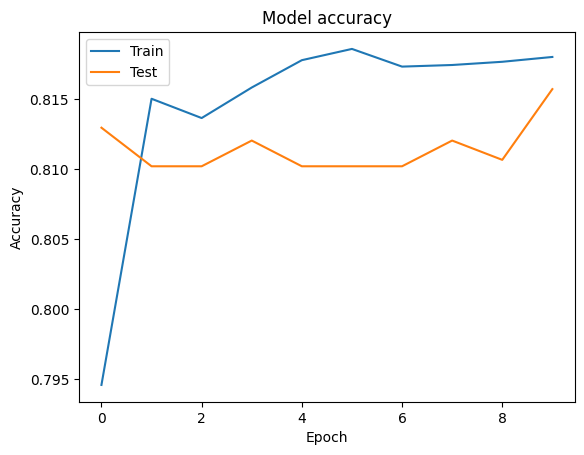

In [91]:
from tensorflow.keras.layers import Dense, Flatten

# Define the CNN architecture
model = Sequential([
    # Flatten the input data as it's not in the format of images
    Flatten(input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and capture the training history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [92]:
# Train the model and capture the training history
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Get the training and validation accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Print the training and validation accuracy
print("Training Accuracy:", train_accuracy[-1])
print("Validation Accuracy:", val_accuracy[-1])


Epoch 1/10
272/272 [==============================] - 1s 2ms/step - loss: 0.4329 - accuracy: 0.8203 - val_loss: 0.4406 - val_accuracy: 0.8130
Epoch 2/10
272/272 [==============================] - 2s 7ms/step - loss: 0.4317 - accuracy: 0.8199 - val_loss: 0.4394 - val_accuracy: 0.8130
Epoch 3/10
272/272 [==============================] - 1s 4ms/step - loss: 0.4299 - accuracy: 0.8202 - val_loss: 0.4394 - val_accuracy: 0.8107
Epoch 4/10
272/272 [==============================] - 3s 11ms/step - loss: 0.4303 - accuracy: 0.8215 - val_loss: 0.4406 - val_accuracy: 0.8120
Epoch 5/10
272/272 [==============================] - 2s 6ms/step - loss: 0.4301 - accuracy: 0.8204 - val_loss: 0.4402 - val_accuracy: 0.8125
Epoch 6/10
272/272 [==============================] - 1s 2ms/step - loss: 0.4297 - accuracy: 0.8211 - val_loss: 0.4410 - val_accuracy: 0.8148
Epoch 7/10
272/272 [==============================] - 1s 3ms/step - loss: 0.4299 - accuracy: 0.8207 - val_loss: 0.4406 - val_accuracy: 0.8134
Epoch

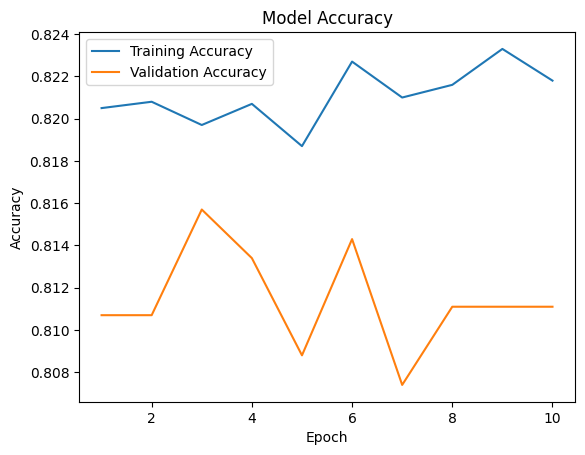

In [93]:
import matplotlib.pyplot as plt

# Training history
training_accuracy = [0.8205, 0.8208, 0.8197, 0.8207, 0.8187, 0.8227, 0.8210, 0.8216, 0.8233, 0.8218]
validation_accuracy = [0.8107, 0.8107, 0.8157, 0.8134, 0.8088, 0.8143, 0.8074, 0.8111, 0.8111, 0.8111]
epochs = range(1, len(training_accuracy) + 1)

# Plot training & validation accuracy values
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


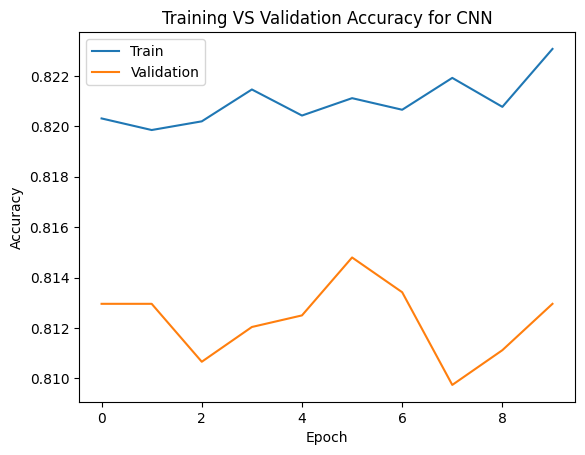

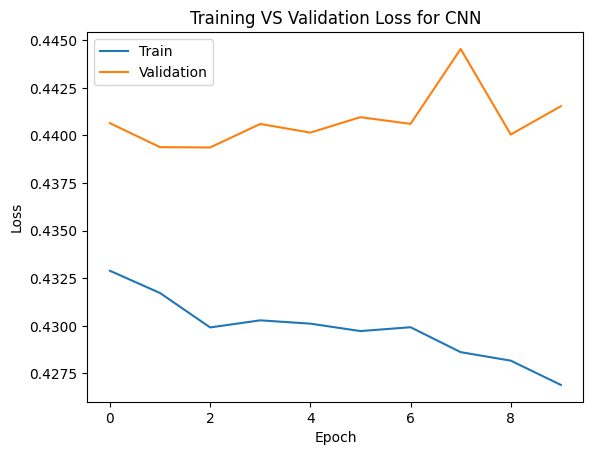

In [94]:
import matplotlib.pyplot as plt
plt.title('Training VS Validation Loss for MLP')
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training VS Validation Accuracy for CNN')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training VS Validation Loss for CNN')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [95]:
import tensorflow as tf

# Example: Define the input shape for your model
input_shape = X_train.shape[1]

# Define a simple MLP model using TensorFlow/Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the MLP model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
272/272 [==============================] - 3s 6ms/step - loss: 0.4630 - accuracy: 0.8131 - val_loss: 0.4449 - val_accuracy: 0.8130
Epoch 2/10
272/272 [==============================] - 1s 2ms/step - loss: 0.4417 - accuracy: 0.8147 - val_loss: 0.4423 - val_accuracy: 0.8102
Epoch 3/10
272/272 [==============================] - 2s 8ms/step - loss: 0.4393 - accuracy: 0.8168 - val_loss: 0.4377 - val_accuracy: 0.8130
Epoch 4/10
272/272 [==============================] - 2s 6ms/step - loss: 0.4364 - accuracy: 0.8178 - val_loss: 0.4387 - val_accuracy: 0.8116
Epoch 5/10
272/272 [==============================] - 2s 6ms/step - loss: 0.4373 - accuracy: 0.8158 - val_loss: 0.4402 - val_accuracy: 0.8107
Epoch 6/10
272/272 [==============================] - 1s 2ms/step - loss: 0.4348 - accuracy: 0.8193 - val_loss: 0.4377 - val_accuracy: 0.8107
Epoch 7/10
272/272 [==============================] - 1s 2ms/step - loss: 0.4330 - accuracy: 0.8199 - val_loss: 0.4371 - val_accuracy: 0.8120
Epoch 

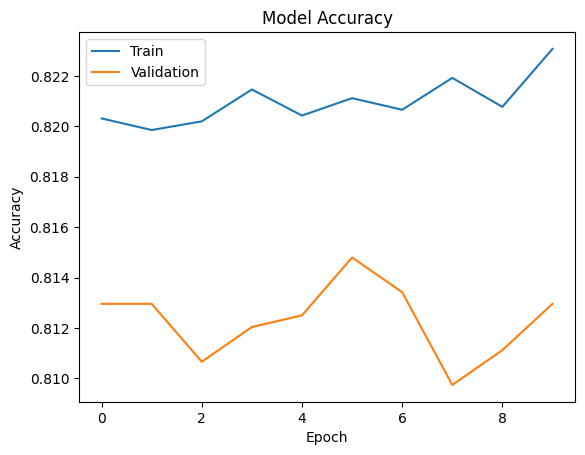

In [96]:
import matplotlib.pyplot as plt

# Define a function to plot the training history
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plot the training history
plot_history(history)


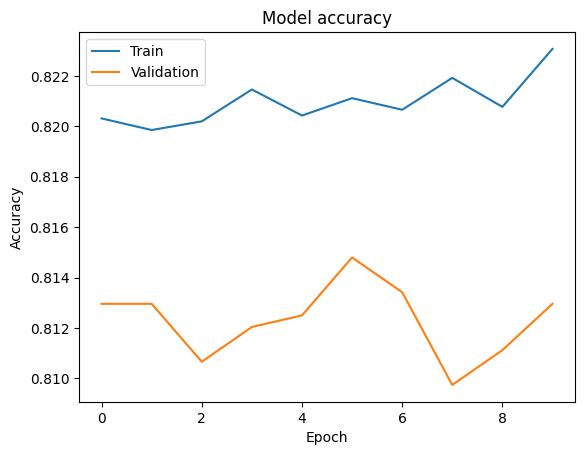

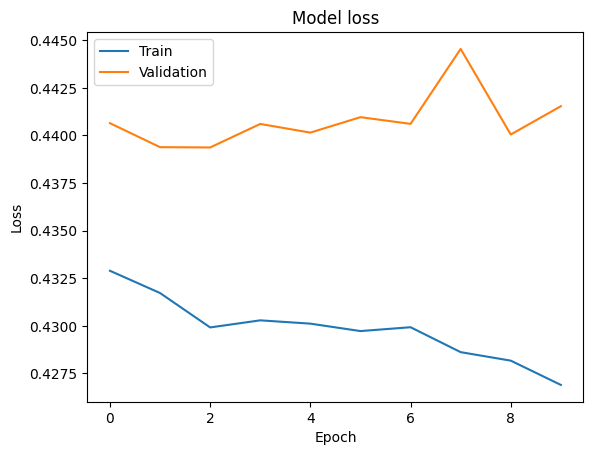

In [97]:
import matplotlib.pyplot as plt

# Assuming you have trained your CNN model and have stored the history of training in a variable named 'history'

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


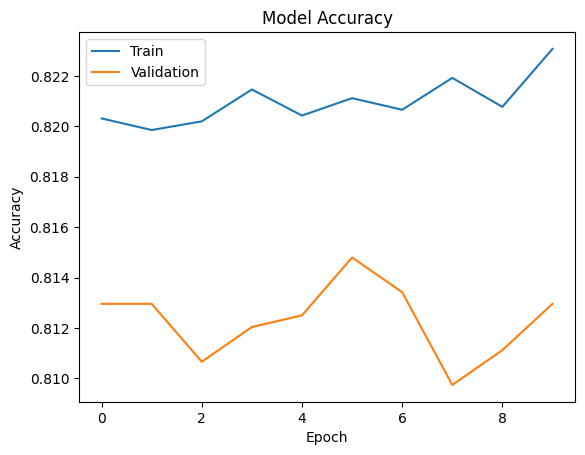

In [98]:
import matplotlib.pyplot as plt

# Define a function to plot the training history
def plot_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

# Plot the training history
plot_history(history)


# Machine Learning Models:

In [16]:
# Define the number of features in your input data
num_features = data.shape[1]

In [17]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data (replace 'data.csv' with your dataset path)
data = pd.read_csv('/content/jm1.csv')

# Convert object columns to numeric
numeric_columns = ['uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
data.dropna(inplace=True)

# Split data into features (X) and target (y)
X = data.drop(columns=['defects'])
y = data['defects']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)


XGBoost Accuracy: 0.8092830882352942


XGBoost Accuracy: 0.8092830882352942
Epoch 1/10
272/272 [==============================] - 3s 4ms/step - loss: 354.8093 - accuracy: 0.6866 - val_loss: 56.9798 - val_accuracy: 0.7969
Epoch 2/10
272/272 [==============================] - 2s 7ms/step - loss: 119.2759 - accuracy: 0.7515 - val_loss: 67.8555 - val_accuracy: 0.7932
Epoch 3/10
272/272 [==============================] - 3s 10ms/step - loss: 60.9092 - accuracy: 0.7273 - val_loss: 65.0305 - val_accuracy: 0.8074
Epoch 4/10
272/272 [==============================] - 3s 10ms/step - loss: 151.4211 - accuracy: 0.7286 - val_loss: 23.8075 - val_accuracy: 0.8088
Epoch 5/10
272/272 [==============================] - 1s 2ms/step - loss: 366.9030 - accuracy: 0.7027 - val_loss: 356.1880 - val_accuracy: 0.3015
Epoch 6/10
272/272 [==============================] - 4s 12ms/step - loss: 51.3914 - accuracy: 0.7278 - val_loss: 30.7756 - val_accuracy: 0.8042
Epoch 7/10
272/272 [==============================] - 3s 12ms/step - loss: 161.7221 - accur

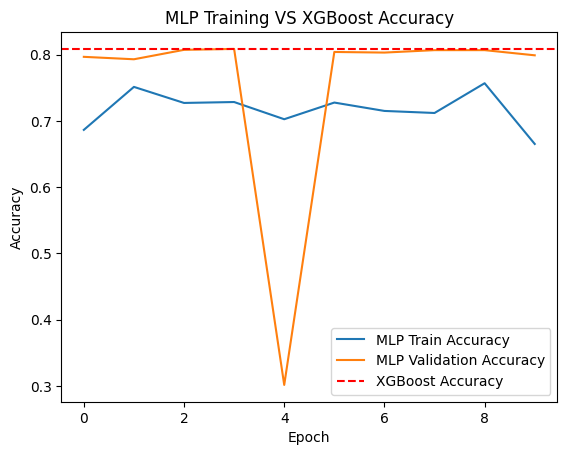

In [18]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load data (replace 'data.csv' with your dataset path)
data = pd.read_csv('/content/jm1.csv')

# Convert object columns to numeric
numeric_columns = ['uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
data.dropna(inplace=True)

# Split data into features (X) and target (y)
X = data.drop(columns=['defects'])
y = data['defects']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Calculate accuracy of XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

# MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot training history of MLP along with accuracy of XGBoost
plt.plot(history.history['accuracy'], label='MLP Train Accuracy')
plt.plot(history.history['val_accuracy'], label='MLP Validation Accuracy')
plt.axhline(y=accuracy_xgb, color='r', linestyle='--', label='XGBoost Accuracy')
plt.title('MLP Training VS XGBoost Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()


XGBoost Accuracy: 0.8092830882352942
Epoch 1/10
272/272 [==============================] - 5s 14ms/step - loss: 668.0512 - accuracy: 0.6345 - val_loss: 200.2661 - val_accuracy: 0.8047
Epoch 2/10
272/272 [==============================] - 8s 31ms/step - loss: 542.2867 - accuracy: 0.7065 - val_loss: 240.5755 - val_accuracy: 0.7495
Epoch 3/10
272/272 [==============================] - 8s 31ms/step - loss: 282.0924 - accuracy: 0.7323 - val_loss: 73.3991 - val_accuracy: 0.8065
Epoch 4/10
272/272 [==============================] - 7s 28ms/step - loss: 139.1798 - accuracy: 0.7680 - val_loss: 37.4471 - val_accuracy: 0.8028
Epoch 5/10
272/272 [==============================] - 6s 24ms/step - loss: 131.6720 - accuracy: 0.7406 - val_loss: 64.4882 - val_accuracy: 0.8088
Epoch 6/10
272/272 [==============================] - 7s 25ms/step - loss: 39.4504 - accuracy: 0.7613 - val_loss: 18.4316 - val_accuracy: 0.8074
Epoch 7/10
272/272 [==============================] - 6s 22ms/step - loss: 147.4992 - 

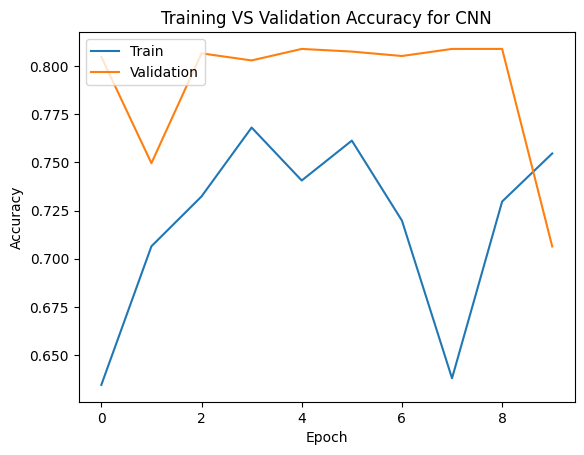

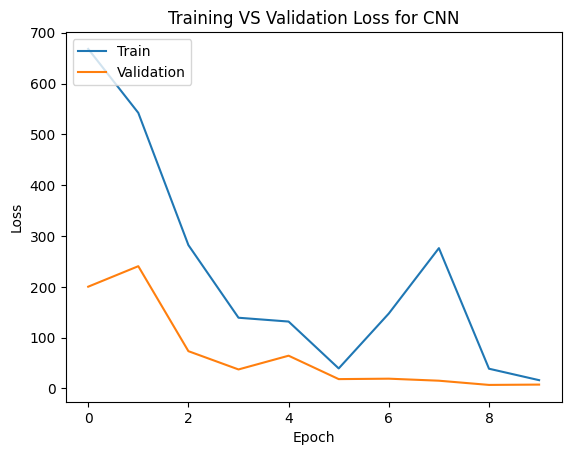

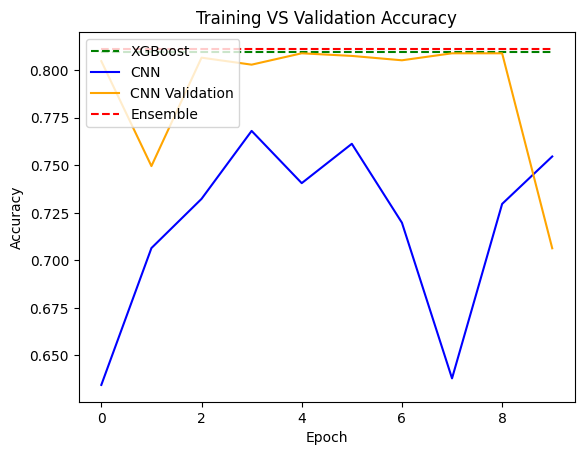

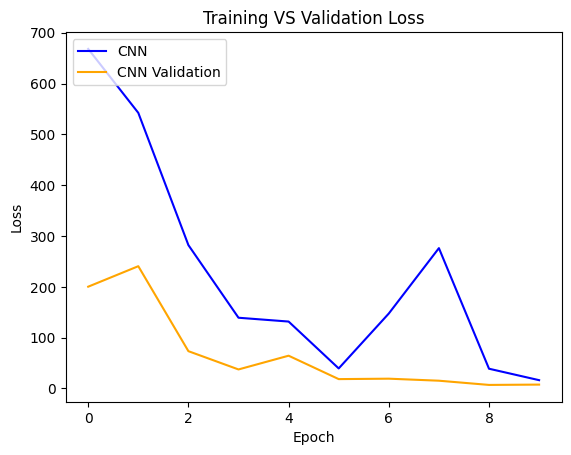

In [19]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Load data (replace 'data.csv' with your dataset path)
data = pd.read_csv('/content/jm1.csv')

# Convert object columns to numeric
numeric_columns = ['uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
data.dropna(inplace=True)

# Split data into features (X) and target (y)
X = data.drop(columns=['defects'])
y = data['defects']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize input features for XGBoost
scaler = StandardScaler()
X_train_xgb = scaler.fit_transform(X_train)
X_test_xgb = scaler.transform(X_test)

# XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_xgb, y_train)
y_pred_xgb = xgb_model.predict(X_test_xgb)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

# Reshape input data for CNN
X_train_cnn = np.reshape(X_train.to_numpy(), (X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = np.reshape(X_test.to_numpy(), (X_test.shape[0], X_test.shape[1], 1))

# CNN model
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

# Ensemble
# Ensemble
y_pred_cnn_proba = model.predict(X_test_cnn)
y_pred_cnn = np.round(y_pred_cnn_proba).flatten()  # Convert probabilities to class labels
ensemble_predictions = np.round((y_pred_xgb + y_pred_cnn) / 2)
accuracy_ensemble = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", accuracy_ensemble)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training VS Validation Accuracy for CNN')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training VS Validation Loss for CNN')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##
# Plot training & validation accuracy values for XGBoost
plt.plot([accuracy_xgb] * len(history.history['accuracy']), linestyle='--', color='green', label='XGBoost')

# Plot training & validation accuracy values for CNN
plt.plot(history.history['accuracy'], color='blue', label='CNN')
plt.plot(history.history['val_accuracy'], color='orange', label='CNN Validation')

# Plot training & validation accuracy values for Ensemble
plt.plot([accuracy_ensemble] * len(history.history['accuracy']), linestyle='--', color='red', label='Ensemble')

plt.title('Training VS Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], color='blue', label='CNN')
plt.plot(history.history['val_loss'], color='orange', label='CNN Validation')

plt.title('Training VS Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()
